In [1]:
import cv2
from skimage.data import astronaut
import numpy as np

In [3]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

가우시안 블러 필터링

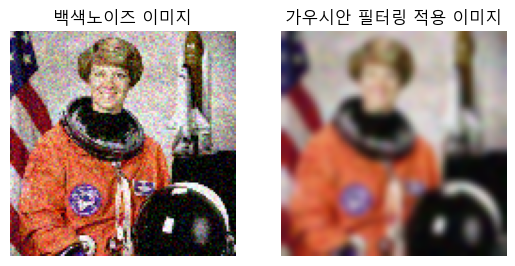

In [6]:
img = astronaut()
img = cv2.resize(img, dsize=(120, 120))
#백색잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0 , 255).astype('uint8')

#가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9,9),2)

plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.title("백색노이즈 이미지")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링 적용 이미지")
plt.axis('off')

plt.show()

OpenCV에서는 bilateralFilter 함수로 구현되어 있다.

bilateralFilter(src, d, sigmaColor, sigmaSpace)

src: 원본 이미지

d: 커널 크기

sigmaColor: 색공간 표준편차. 값이 크면 색이 많이 달라도 픽셀들이 서로 영향을 미친다.

sigmaSpace: 거리공간 표준편차. 값이 크면 멀리 떨어져있는 픽셀들이 서로 영향을 미친다.

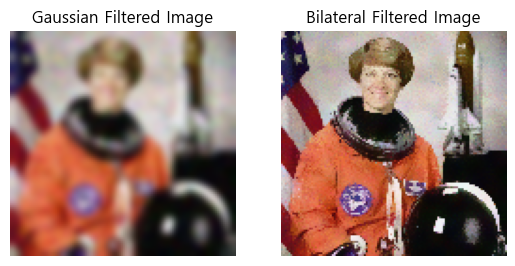

In [8]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9,9),2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1,2,1)
plt.imshow(img_denoise1)
plt.title("Gaussian Filtered Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_denoise2)
plt.title("Bilateral Filtered Image")
plt.axis('off')

plt.show()

형태학적 변환

shape: 커널 모양

cv2.MORPH_RECT: 사각형

cv2.MORPH_ELLIPSE: 타원형

cv2.TMORPH_CROSS: 십자

ksize: 커널 크기

In [9]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [10]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [13]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

침식 기법

OpenCV에서는 erode함수로 구현되어 있다.

erode(src, kernel)

src: 원본 이미지

kernel: 커널

In [14]:
from skimage.data import horse

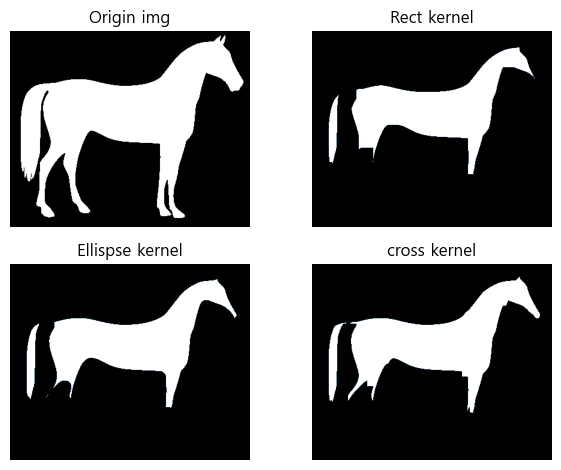

In [21]:
img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ['Rect kernel', 'Ellispse kernel', 'cross kernel']

plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Origin img")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

팽창

팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체하는 것이다. OpenCV에서는 dilate 함수로 구현되어 있다.

dilate(src, kernel)

src: 원본 이미지

kernel: 커널

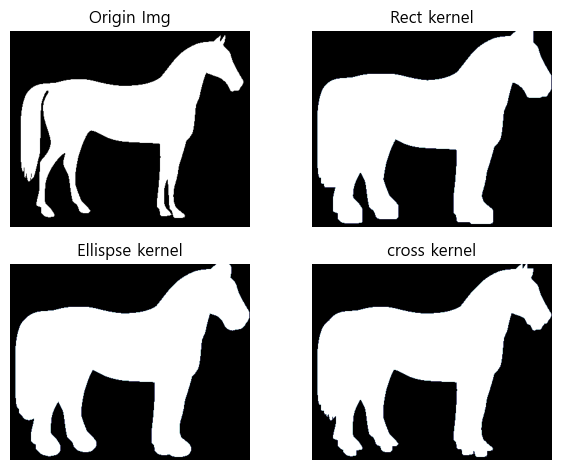

In [23]:
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title('Origin Img')
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

그레디언트, 오프닝, 클로징

그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것이다.

이와 유사한 기법으로 오프닝(Opening)과 클로징(Closing)이 있다. 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는데 적합하다. 클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합하다.

그레디언트를 구하려면 OpenCV의 morphologyEx 라는 함수를 사용한다.

morphologyEx(src, op, kernel)

src: 원본 이미지

op:

cv2.MORPH_OPEN: cv2.dilate(cv2.erode(image))

cv2.MORPH_CLOSE: cv2.erode(cv2.dilate(image))

cv2.MORPH_GRADIENT: cv2.dilate(image) - cv2.erode(image)

cv2.MORPH_TOPHAT: image - opening(image)

cv2.MORPH_BLACKHAT: image - closing(image)

kernel: 커널


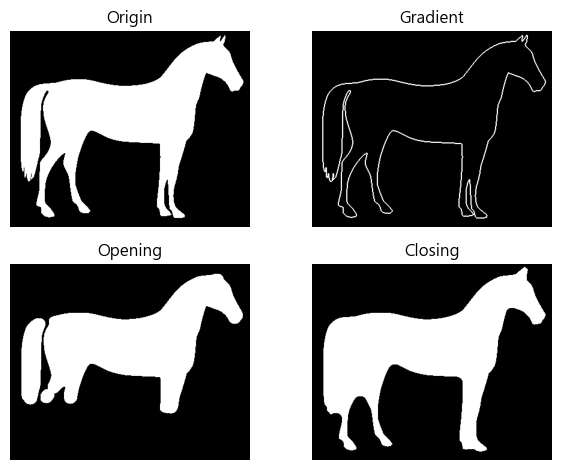

In [26]:
opening  = cv2.morphologyEx(img, cv2.MORPH_OPEN,
                           cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
gradient =cv2.morphologyEx(img, cv2.MORPH_GRADIENT,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)))
images = [img, gradient, opening, closing]
titles = ['Origin', 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()
    